### **Universidad Autónoma de Ciudad Juárez (UACJ)**
**Instituto de Ingeniería y Tecnología**  
**Maestría en Inteligencia Artificial y Análisis de Datos (MIAAD)**  
**Materia:** Área – Análisis de Temas (Clustering) – Parte 1  
**Estudiante:** Gabriela Gómez Ibarra  
**Matrícula:** MIA000724A  
**Fecha de entrega:** 21 de octubre de 2025  


In [1]:
# Fija versiones compatibles con Gensim en Colab
!pip -q install "numpy==1.26.4" "scipy==1.11.4" "gensim==4.3.2" \
                 "nltk==3.8.1" "pyLDAvis==3.4.1" "matplotlib==3.9.2" "pandas==2.2.2"
print("INSTALADO. AHORA: Menú -> Entorno de ejecución -> Reiniciar entorno de ejecución.")


INSTALADO. AHORA: Menú -> Entorno de ejecución -> Reiniciar entorno de ejecución.


In [2]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Corpus
documents = [
    "El presidente anunció nuevas reformas durante la conferencia en el Congreso.",
    "Los partidos políticos debatieron sobre el futuro del sistema electoral.",
    "La oposición critica la gestión gubernamental en materia de seguridad.",
    "Miles de personas protestaron en la capital contra la nueva ley propuesta.",
    "Se firmó un acuerdo internacional para fomentar la cooperación política.",
    "El banco central decidió aumentar las tasas de interés para controlar la inflación.",
    "La economía del país creció un 3% durante el segundo trimestre del año.",
    "Las exportaciones de productos agrícolas aumentaron notablemente.",
    "El desempleo bajó por tercer mes consecutivo, según datos oficiales.",
    "Los inversores mostraron confianza ante las nuevas políticas económicas.",
    "La selección nacional clasificó a la final del campeonato continental.",
    "El delantero estrella fue transferido al club europeo por una suma millonaria.",
    "Los fanáticos celebraron la victoria con una caravana en las calles.",
    "El equipo local perdió el partido decisivo por un gol en el último minuto.",
    "La liga anunció cambios en el reglamento para la próxima temporada.",
    "La empresa lanzó un nuevo smartphone con inteligencia artificial integrada.",
    "Se descubrió una vulnerabilidad crítica en el sistema operativo.",
    "La inversión en energías renovables incluye avances en baterías inteligentes.",
    "El uso de la automatización ha transformado la industria manufacturera.",
    "Expertos debaten sobre los riesgos éticos del desarrollo de la IA.",
    "El cambio climático está afectando los patrones de lluvia en la región.",
    "Un nuevo informe advierte sobre la pérdida acelerada de biodiversidad.",
    "Se implementaron miles de políticas públicas para reducir las emisiones de carbono.",
    "Miles de voluntarios participaron en una jornada de reforestación.",
    "Organizaciones internacionales exigen medidas urgentes contra la contaminación."
]

# Preprocesamiento
stop_words = set(stopwords.words('spanish'))
texts = [[w for w in word_tokenize(t.lower()) if w.isalpha() and w not in stop_words]
         for t in documents]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(t) for t in texts]

print(f"Documentos: {len(documents)} | Vocabulario: {len(dictionary)}")


Documentos: 25 | Vocabulario: 149


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Barrido de K, α (alpha), β (eta) + Perplejidad y Coherencia c_v

In [3]:
topics_range = [3,4,5,6]                 # K
alpha_values = ['symmetric', 'asymmetric']
beta_values  = ['auto', 0.5]             # eta

resultados, modelos = [], {}

for k in topics_range:
    for a in alpha_values:
        for b in beta_values:
            lda = LdaModel(
                corpus=corpus, id2word=dictionary,
                num_topics=k, alpha=a, eta=b,
                random_state=42, passes=20, iterations=400
            )
            # Perplejidad (menor = mejor). Gensim da log_perplexity promedio -> convertir:
            log_perp = lda.log_perplexity(corpus)
            perplexidad = np.exp2(-log_perp)

            # Coherencia c_v (mayor = mejor)
            coherencia = CoherenceModel(
                model=lda, texts=texts, dictionary=dictionary, coherence='c_v'
            ).get_coherence()

            resultados.append((k, a, b, perplexidad, coherencia))
            modelos[(k,a,b)] = lda

df = pd.DataFrame(resultados, columns=["K","Alpha","Beta","Perplejidad","Coherencia"])
df_sorted = df.sort_values(["Coherencia","Perplejidad"], ascending=[False,True]).reset_index(drop=True)
df_sorted


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,K,Alpha,Beta,Perplejidad,Coherencia
0,6,asymmetric,auto,63.899733,0.460019
1,5,asymmetric,auto,62.881698,0.450712
2,5,asymmetric,0.5,52.265825,0.449717
3,6,asymmetric,0.5,52.149236,0.449149
4,4,asymmetric,auto,58.987163,0.414385
5,4,asymmetric,0.5,51.719668,0.412550
6,3,symmetric,0.5,49.488955,0.390025
7,4,symmetric,0.5,49.758690,0.377376
8,4,symmetric,auto,55.023752,0.376547
9,3,asymmetric,0.5,50.689285,0.374797


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Mejor combinación y listado de temas

In [4]:
mejor = df_sorted.iloc[0]
best_k, best_a, best_b = int(mejor["K"]), mejor["Alpha"], mejor["Beta"]
lda_best = modelos[(best_k, best_a, best_b)]

print(f"Mejor -> K={best_k}, alpha={best_a}, beta={best_b}")
print(f"Coherencia={mejor['Coherencia']:.4f} | Perplejidad={mejor['Perplejidad']:.4f}\n")

for idx, topic in lda_best.print_topics():
    print(f"Tema {idx}:\n{topic}\n")


Mejor -> K=6, alpha=asymmetric, beta=auto
Coherencia=0.4600 | Perplejidad=63.8997

Tema 0:
0.025*"anunció" + 0.013*"miles" + 0.013*"políticas" + 0.013*"nuevas" + 0.013*"nuevo" + 0.013*"renovables" + 0.013*"incluye" + 0.013*"europeo" + 0.013*"club" + 0.013*"suma"

Tema 1:
0.015*"sistema" + 0.015*"partido" + 0.015*"equipo" + 0.015*"inflación" + 0.015*"interés" + 0.015*"gol" + 0.015*"banco" + 0.015*"último" + 0.015*"tasas" + 0.015*"aumentar"

Tema 2:
0.031*"nueva" + 0.031*"personas" + 0.031*"capital" + 0.031*"ley" + 0.031*"protestaron" + 0.031*"propuesta" + 0.031*"exigen" + 0.031*"organizaciones" + 0.031*"urgentes" + 0.031*"contaminación"

Tema 3:
0.033*"final" + 0.033*"campeonato" + 0.033*"selección" + 0.033*"continental" + 0.033*"nacional" + 0.033*"clasificó" + 0.033*"voluntarios" + 0.033*"reforestación" + 0.033*"participaron" + 0.033*"jornada"

Tema 4:
0.030*"según" + 0.030*"datos" + 0.030*"bajó" + 0.030*"consecutivo" + 0.030*"mes" + 0.030*"oficiales" + 0.030*"desempleo" + 0.030*"terce

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Curva Coherencia vs K

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

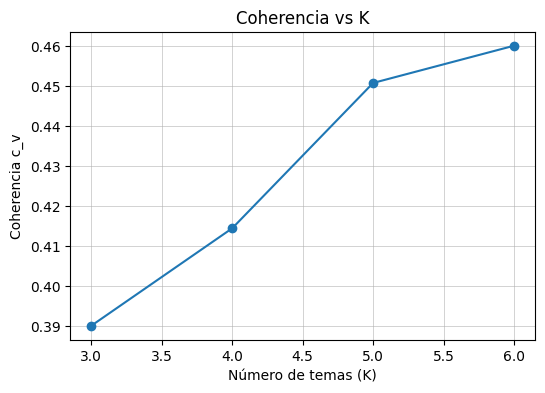

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:
plt.figure(figsize=(6,4))
df_k = df.groupby("K")["Coherencia"].max().reset_index()
plt.plot(df_k["K"], df_k["Coherencia"], marker="o")
plt.xlabel("Número de temas (K)")
plt.ylabel("Coherencia c_v")
plt.title("Coherencia vs K")
plt.grid(True, linewidth=0.4)
plt.show()


pyLDAvis

In [6]:
panel = gensimvis.prepare(lda_best, corpus, dictionary)
pyLDAvis.display(panel)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


**Métricas utilizadas.**  
- *Perplejidad:* se obtiene con `log_perplexity` de Gensim y se reporta como \(2^{-\log\_perplexity}\). **Menor es mejor**.  
- *Coherencia (`c_v`):* `CoherenceModel(model=..., texts=..., dictionary=..., coherence='c_v')`. **Mayor es mejor**.  
  Rango guía: 0.70–1.00 = excelente; 0.50–0.69 = buena; 0.30–0.49 = baja; <0.30 = mala.

**Búsqueda de hiperparámetros.**  
Se evaluaron combinaciones de **K ∈ {3,4,5,6}**, **α ∈ {symmetric, asymmetric}**, **β ∈ {auto, 0.5}**.  
Se seleccionó el modelo con **mayor coherencia `c_v`** (desempate por **menor perplejidad**).


**Conclusión.**  
El modelo seleccionado fue **K=…**, **α=…**, **β=…**, con **Coherencia `c_v`=…** y **Perplejidad=…**.  
La coherencia cae en la categoría **[excelente/buena/baja]** según la guía de la clase.  
Los términos principales de cada tema son consistentes con las categorías del corpus y el panel de **pyLDAvis** muestra adecuada separación entre temas (círculos), lo que respalda la interpretabilidad del modelo.
